In [175]:
import numpy as np
import networkx as nx
from torch_geometric.datasets import Twitch

lang = 'RU'

langs = ['DE', 'EN', 'ES', 'FR', 'PT', 'RU']

dataset = Twitch(root='data/Twitch', name=lang)

In [176]:
data = np.load(f'data/Twitch/{lang}/raw/{lang}.npz')
# lst = data.files
# for item in lst:
#     print(item)
#     print(data[item])

out_data = []
for model_lang in langs:
    if model_lang != lang:
        with open(f"outputs/{model_lang}_{lang}.txt", "r") as f:
            out = f.read()
            out = list(map(int, out[:-1].split('\n')))
            out_data.append(out)

In [177]:
color_maps = []
for out in out_data:
    color_maps.append(list(map( lambda x: "red" if x else "green", out)))

In [178]:
G = nx.from_edgelist(data['edges'])
G.remove_edges_from(nx.selfloop_edges(G))
# color_map = list(map( lambda x: "red" if x else "green", data['target']))
# nx.write_gexf(G, 'graph.gexf')

100%|██████████| 5/5 [01:57<00:00, 23.45s/it]


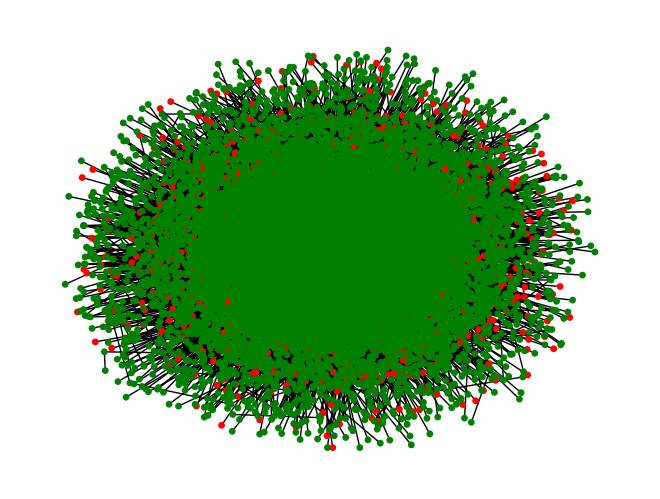

In [179]:
import matplotlib.pyplot as plt
from tqdm import tqdm

for i, color_map in enumerate(tqdm(color_maps)):
    nx.draw(G, node_size=15, node_color=color_map,pos=nx.spring_layout(G, k=8/np.sqrt(G.order())))
    plt.savefig(f'output_graphs/{lang}_{i}.png')

In [180]:
# nx.draw(G, node_size=15, node_color=color_maps[2],pos=nx.spring_layout(G, k=8/np.sqrt(G.order())))

In [181]:
# nx.draw(G, node_size=15, node_color=color_maps[3],pos=nx.spring_layout(G, k=8/np.sqrt(G.order())))

In [182]:
# nx.draw(G, node_size=15, node_color=color_maps[4],pos=nx.spring_layout(G, k=8/np.sqrt(G.order())))

In [183]:
# nx.draw(G, node_size=15, node_color=color_map,pos=nx.spectral_layout(G))

In [184]:
# nx.draw(G, node_size=15, node_color=color_map,pos=nx.spiral_layout(G))

In [185]:
# nx.draw(G, node_size=15, node_color=color_map,pos=nx.kamada_kawai_layout(G))